In [1]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import t as t_dist
from scipy.stats import f as f_dist

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('students_simple.csv')
N = 14
col1_idx = N % 5
col2_idx = (N**2) % 5 + 5

# Получаем названия столбцов
columns = df.columns.tolist()
col1_name = columns[col1_idx]
col2_name = columns[col2_idx]

In [4]:
print(f"Номер студента: {N}")
print(f"Столбец 1 (индекс {col1_idx}): {col1_name}")
print(f"Столбец 2 (индекс {col2_idx}): {col2_name}")

Номер студента: 14
Столбец 1 (индекс 4): pages
Столбец 2 (индекс 6): bmi


In [7]:
# Выбираем данные
x = df[col1_name].dropna().values
y = df[col2_name].dropna().values

# Обрезаем до минимальной длины (если разная длина)
min_len = min(len(x), len(y))
x = x[:min_len]
y = y[:min_len]

print(f"Размер выборки: {len(x)}")
print(f"X: {col1_name}, среднее = {x.mean():.2f}, std = {x.std():.2f}")
print(f"Y: {col2_name}, среднее = {y.mean():.2f}, std = {y.std():.2f}")

Размер выборки: 20
X: pages, среднее = 42.60, std = 21.43
Y: bmi, среднее = 2.61, std = 0.43


In [8]:
# Задание 1. Рассчет корреляций

In [ ]:
'''
1. Корреляция Фехнера — качественный критерий, основанный только на сравнении знаков отклонений от среднего.
- Если x и y отклоняются от среднего в одну сторону — считается «совпадение».
- В разные — «противоположность»

2. Корреляция Пирсона:
Измеряет линейную связь между x и y.
Интервал: [−1, 1].
- |r| < 0.3 → слабая корреляция
- r < 0 → обратная зависимость
Ковариация определяется как среднее произведение отклонений значений двух признаков от их средних значений.
cov = ∑i=1n ((xi − x)(yi − y)) / (n − 1)

3. Корреляция Спирмена:
Спирмен оценивает связь монотонного типа (не обязательно линейную).
Работает по рангам: сравнивает порядок значений.
Рангом i-го элемента выборки xi называется его порядковый номер R(xi) в упорядоченном ряду (вариационном ряду).
K = 1 − (6 / (n(n−1)(n+1))) * (∑i=1n(R(xi)−R(yi))2)

4. Корреляция Кендалла: 
Кендалл оценивает согласованные и несогласованные пары, измеряет «насколько часто порядок x совпадает с порядком y».
K = 1 − (4 / (n(n−1))) * ∑i=1n−1∑j=i+1n[[xi < xj] ≠ [yi < yj]]
'''

In [8]:
# 1.1 Корреляция Фехнера
x_mean = np.mean(x)
y_mean = np.mean(y)
    
sign_x = np.sign(x - x_mean)
sign_y = np.sign(y - y_mean)
    
matches = np.sum(sign_x == sign_y)
mismatches = np.sum(sign_x != sign_y)
    
K_fehner = (matches - mismatches) / len(x)

# 1.2 Корреляция Пирсона + доверительный интервал
x_mean = np.mean(x)
y_mean = np.mean(y)
    
cov = np.sum((x - x_mean) * (y - y_mean)) / (len(x) - 1)
s_x = np.sqrt(np.sum((x - x_mean)**2) / (len(x) - 1))
s_y = np.sqrt(np.sum((y - y_mean)**2) / (len(y) - 1))
    
K_pirson = cov / (s_x * s_y)
pearson_scipy, p_scipy = stats.pearsonr(x, y)

alpha = 0.05
n = len(x)
# Преобразование Фишера
z = 0.5 * np.log((1 + K_pirson) / (1 - K_pirson))
se = 1 / np.sqrt(n - 3)
    
# Квантиль нормального распределения
z_crit = stats.norm.ppf(1 - alpha/2)
    
# Границы в z-шкале
z_low = z - z_crit * se
z_high = z + z_crit * se
    
# Обратное преобразование
r_low = (np.exp(2*z_low) - 1) / (np.exp(2*z_low) + 1)
r_high = (np.exp(2*z_high) - 1) / (np.exp(2*z_high) + 1)

# 1.3 Корреляция Спирмена
# Ранжирование
rx = stats.rankdata(x)
ry = stats.rankdata(y)
    
# Корреляция Пирсона по рангам
r_mean = np.mean(rx)
    
numerator = np.sum((rx - r_mean) * (ry - r_mean))
denominator = np.sqrt(np.sum((rx - r_mean)**2) * np.sum((ry - r_mean)**2))
    
K_spirmen = numerator / denominator
spearman_scipy, p_spearman = stats.spearmanr(x, y)

# 1.4 Корреляция Кендалла
discordant = 0
    
for i in range(n - 1):
    for j in range(i + 1, n):
        # Проверяем несовпадение знаков
        if (x[i] < x[j]) != (y[i] < y[j]):
            discordant += 1
    
total_pairs = n * (n - 1) / 2
K_kendall = 1 - (4 * discordant) / (n * (n - 1))

kendall_scipy, p_kendall = stats.kendalltau(x, y)

In [9]:
print("1. КОРРЕЛЯЦИОННЫЙ АНАЛИЗ")
print("="*50)

print(f"1.1 Корреляция Фехнера: {K_fehner:.4f}")
print(f"    Диапазон: [-1, 1]")

print(f"\n1.2 Корреляция Пирсона: {K_pirson:.4f}")
print(f"    Доверительный интервал (95%): [{r_low:.4f}, {r_high:.4f}]")

# Проверка значимости корреляции Пирсона
n = len(x)
T = K_pirson * np.sqrt(n - 2) / np.sqrt(1 - K_pirson**2)
if n < 30:
    p_value = 2 * (1 - stats.t.cdf(abs(T), n - 2))
    print(f"    T-статистика: {T:.4f} (распределение Стьюдента, df={n-2})")
else:
    p_value = 2 * (1 - stats.norm.cdf(abs(T)))
    print(f"    T-статистика: {T:.4f} (нормальное распределение)")
print(f"    p-value: {p_value:.4e}")
print(f"    Значима: {'Да' if p_value < 0.05 else 'Нет'}")

print(f"    Проверка (scipy): r={pearson_scipy:.4f}, p={p_scipy:.4e}")

print(f"\n1.3 Корреляция Спирмена: {K_spirmen:.4f}")
print(f"    Проверка (scipy): r={spearman_scipy:.4f}, p={p_spearman:.4e}")

print(f"\n1.4 Корреляция Кендалла: {K_kendall:.4f}")
print(f"    Проверка (scipy): τ={kendall_scipy:.4f}, p={p_kendall:.4e}")

1. КОРРЕЛЯЦИОННЫЙ АНАЛИЗ
1.1 Корреляция Фехнера: -0.4000
    Диапазон: [-1, 1]

1.2 Корреляция Пирсона: -0.1795
    Доверительный интервал (95%): [-0.5762, 0.2857]
    T-статистика: -0.7741 (распределение Стьюдента, df=18)
    p-value: 4.4891e-01
    Значима: Нет
    Проверка (scipy): r=-0.1795, p=4.4891e-01

1.3 Корреляция Спирмена: -0.3239
    Проверка (scipy): r=-0.3239, p=1.6352e-01

1.4 Корреляция Кендалла: -0.1474
    Проверка (scipy): τ=-0.2442, p=1.5384e-01


In [ ]:
'''
1.1 Корреляция Фехнера: −0.4000
Значение −0.40 означает умеренную тенденцию к противоположному направлению: когда x растёт относительно своего среднего, y чаще падает, и наоборот.

1.2 Корреляция Пирсона: −0.1795 (p = 0.4489)
r = −0.18 → слабая отрицательная линейная связь
p = 0.4489 > 0.05 → связь статистически не значима
95% доверительный интервал: [−0.5762; 0.2857]
интервал включает 0 → также указывает на отсутствие значимой связи.

Вывод:
Линейной связи между x и y нет.

1.3 Корреляция Спирмена: −0.3239 (p = 0.1635)
r = −0.324 → умеренная отрицательная монотонная связь
p = 0.1635 > 0.05 → статистически не значима

Вывод:
Слабая монотонная тенденция есть, но она не подтверждается статистически.

1.4 Корреляция Кендалла: −0.1474 (τ SciPy = −0.2442, p = 0.1538)
τ ≈ −0.24 → слабая отрицательная связь
p = 0.1538 > 0.05 → не значимо
'''

In [10]:
# Задание 2. Визуализация

2. ВИЗУАЛИЗАЦИЯ


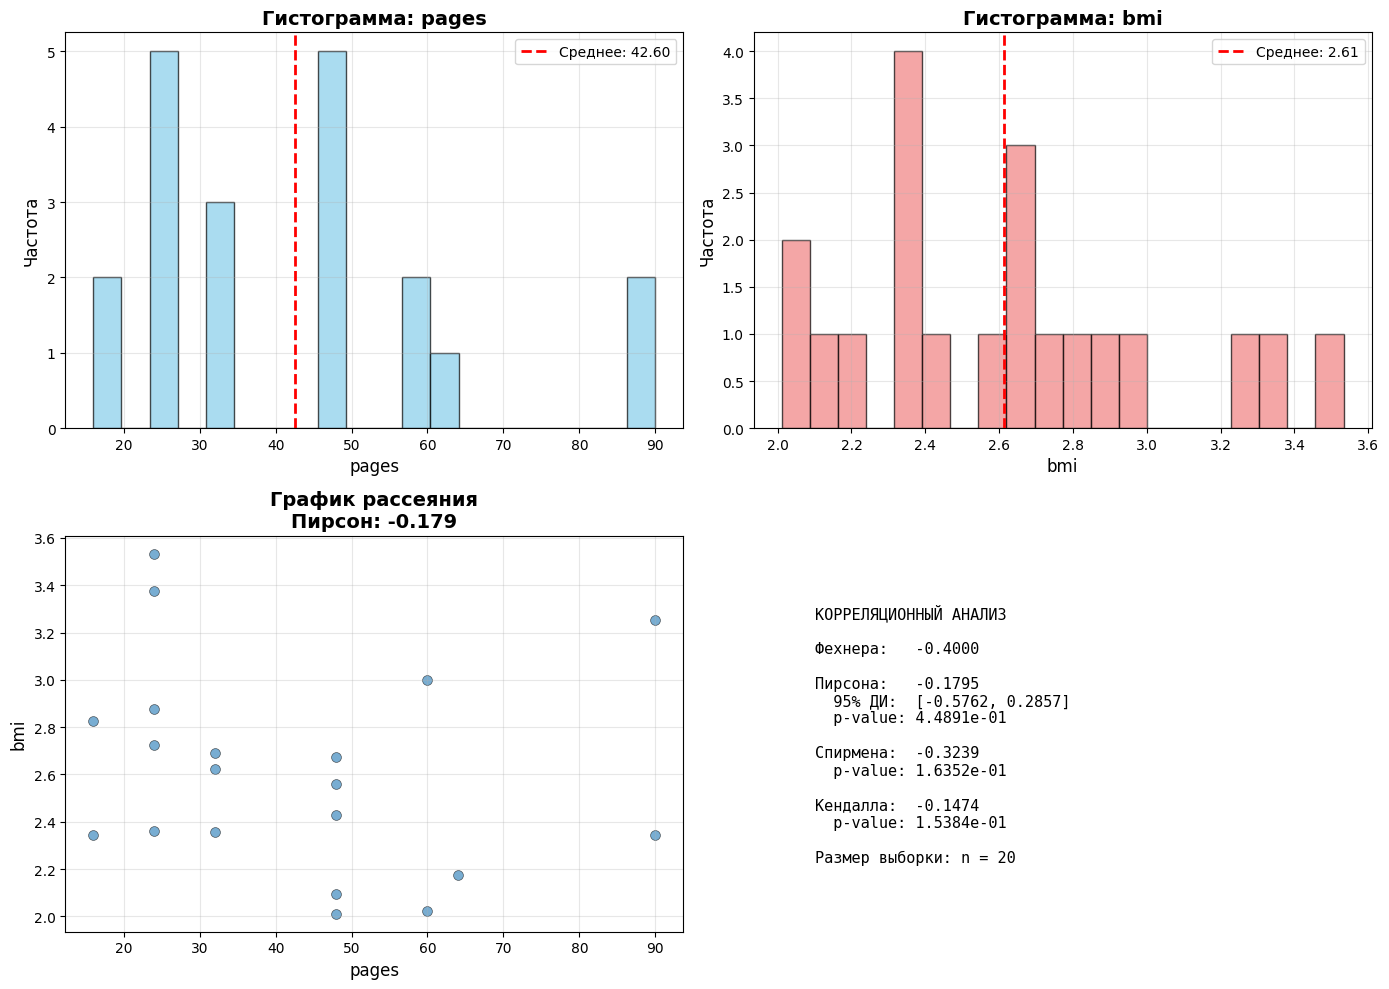

In [15]:
print("2. ВИЗУАЛИЗАЦИЯ")
print("="*50)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 2.1 Гистограмма X
axes[0, 0].hist(x, bins=20, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 0].axvline(x.mean(), color='red', linestyle='--', linewidth=2, label=f'Среднее: {x.mean():.2f}')
axes[0, 0].set_xlabel(col1_name, fontsize=12)
axes[0, 0].set_ylabel('Частота', fontsize=12)
axes[0, 0].set_title(f'Гистограмма: {col1_name}', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2.2 Гистограмма Y
axes[0, 1].hist(y, bins=20, edgecolor='black', alpha=0.7, color='lightcoral')
axes[0, 1].axvline(y.mean(), color='red', linestyle='--', linewidth=2, label=f'Среднее: {y.mean():.2f}')
axes[0, 1].set_xlabel(col2_name, fontsize=12)
axes[0, 1].set_ylabel('Частота', fontsize=12)
axes[0, 1].set_title(f'Гистограмма: {col2_name}', fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 2.3 График рассеяния
axes[1, 0].scatter(x, y, alpha=0.6, s=50, edgecolors='k', linewidths=0.5)
axes[1, 0].set_xlabel(col1_name, fontsize=12)
axes[1, 0].set_ylabel(col2_name, fontsize=12)
axes[1, 0].set_title(f'График рассеяния\nПирсон: {K_pirson:.3f}', 
                     fontsize=14, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# 2.4 Сводка корреляций
axes[1, 1].axis('off')
corr_text = f"""
КОРРЕЛЯЦИОННЫЙ АНАЛИЗ

Фехнера:   {K_fehner:>7.4f}

Пирсона:   {K_pirson:>7.4f}
  95% ДИ:  [{r_low:.4f}, {r_high:.4f}]
  p-value: {p_value:.4e}

Спирмена:  {K_spirmen:>7.4f}
  p-value: {p_spearman:.4e}

Кендалла:  {K_kendall:>7.4f}
  p-value: {p_kendall:.4e}

Размер выборки: n = {len(x)}
"""
axes[1, 1].text(0.1, 0.5, corr_text, fontsize=11, family='monospace',
               verticalalignment='center')

plt.tight_layout()
plt.show()

In [12]:
# 3. Уравнение регрессии

In [16]:
print("3. УРАВНЕНИЯ РЕГРЕССИИ")
print("="*50)

# Функция для расчета R^2
def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - ss_res / ss_tot

# 3.1 Линейная регрессия: y = w1*x + w0
print("3.1 Линейная регрессия: y = w1*x + w0")

X_lin = np.column_stack([x, np.ones(len(x))])
w_lin = np.linalg.lstsq(X_lin, y, rcond=None)[0]
y_pred_lin = X_lin @ w_lin
r2_lin = r_squared(y, y_pred_lin)

print(f"    w1 = {w_lin[0]:.4f}")
print(f"    w0 = {w_lin[1]:.4f}")
print(f"    R² = {r2_lin:.4f}")
print(f"    Уравнение: y = {w_lin[0]:.4f}*x + {w_lin[1]:.4f}")

# 3.2 Квадратичная регрессия: y = w2*x² + w1*x + w0
print("\n3.2 Квадратичная регрессия: y = w2*x² + w1*x + w0")

X_quad = np.column_stack([x**2, x, np.ones(len(x))])
w_quad = np.linalg.lstsq(X_quad, y, rcond=None)[0]
y_pred_quad = X_quad @ w_quad
r2_quad = r_squared(y, y_pred_quad)

print(f"    w2 = {w_quad[0]:.4f}")
print(f"    w1 = {w_quad[1]:.4f}")
print(f"    w0 = {w_quad[2]:.4f}")
print(f"    R² = {r2_quad:.4f}")
print(f"    Уравнение: y = {w_quad[0]:.4f}*x² + {w_quad[1]:.4f}*x + {w_quad[2]:.4f}")

# 3.3 Гиперболическая регрессия: y = w1/x + w0
print("\n3.3 Гиперболическая регрессия: y = w1/x + w0")

# Убираем нулевые значения x
mask = x != 0
x_hyp = x[mask]
y_hyp = y[mask]

X_hyp = np.column_stack([1/x_hyp, np.ones(len(x_hyp))])
w_hyp = np.linalg.lstsq(X_hyp, y_hyp, rcond=None)[0]
y_pred_hyp = X_hyp @ w_hyp
r2_hyp = r_squared(y_hyp, y_pred_hyp)

print(f"    w1 = {w_hyp[0]:.4f}")
print(f"    w0 = {w_hyp[1]:.4f}")
print(f"    R² = {r2_hyp:.4f}")
print(f"    Уравнение: y = {w_hyp[0]:.4f}/x + {w_hyp[1]:.4f}")

# 3.4 Показательная регрессия: y = w1^x * w0
# Преобразование: ln(y) = x*ln(w1) + ln(w0)
print("\n3.4 Показательная регрессия: y = w1^x * w0")

# Убираем отрицательные и нулевые значения y
mask_exp = y > 0
x_exp = x[mask_exp]
y_exp = y[mask_exp]

if len(y_exp) > 0:
    y_log = np.log(y_exp)
    X_exp = np.column_stack([x_exp, np.ones(len(x_exp))])
    w_exp_log = np.linalg.lstsq(X_exp, y_log, rcond=None)[0]
    
    w1_exp = np.exp(w_exp_log[0])
    w0_exp = np.exp(w_exp_log[1])
    
    y_pred_exp = w0_exp * (w1_exp ** x_exp)
    r2_exp = r_squared(y_exp, y_pred_exp)
    
    print(f"    w1 = {w1_exp:.4f}")
    print(f"    w0 = {w0_exp:.4f}")
    print(f"    R² = {r2_exp:.4f}")
    print(f"    Уравнение: y = {w1_exp:.4f}^x * {w0_exp:.4f}")
else:
    print("    Невозможно построить (нет положительных значений y)")
    r2_exp = -np.inf
    w1_exp = w0_exp = 0

3. УРАВНЕНИЯ РЕГРЕССИИ
3.1 Линейная регрессия: y = w1*x + w0
    w1 = -0.0036
    w0 = 2.7650
    R² = 0.0322
    Уравнение: y = -0.0036*x + 2.7650

3.2 Квадратичная регрессия: y = w2*x² + w1*x + w0
    w2 = 0.0003
    w1 = -0.0371
    w0 = 3.4518
    R² = 0.1830
    Уравнение: y = 0.0003*x² + -0.0371*x + 3.4518

3.3 Гиперболическая регрессия: y = w1/x + w0
    w1 = 7.3407
    w0 = 2.3922
    R² = 0.0670
    Уравнение: y = 7.3407/x + 2.3922

3.4 Показательная регрессия: y = w1^x * w0
    w1 = 0.9986
    w0 = 2.7439
    R² = 0.0289
    Уравнение: y = 0.9986^x * 2.7439


In [ ]:
'''
3.1 Линейная регрессия
- y = −0.0036·x + 2.7650
- R² = 0.0322
- Уравнение почти горизонтальное (наклон ≈ 0). R² = 0.03 → модель объясняет всего 3% вариации y.
- Линейной зависимости нет.

3.2 Квадратичная регрессия
- y = 0.0003·x² − 0.0371·x + 3.4518
- R² = 0.1830 (лучшая модель)
- Небольшая нелинейность улучшила качество
- 18.3% объяснённой вариации — слабая, но лучше всех других моделей

3.3 Гиперболическая регрессия
- y = 7.3407/x + 2.3922
- R² = 0.0670
- Связь гиперболического типа отсутствует.

3.4 Показательная регрессия
- y = 2.7439 · (0.9986)^x
- R² = 0.0289 (худшая)
- Основание 0.9986 ≈ 1 → функция почти константная
- Экспоненциальная зависимость отсутствует.
'''

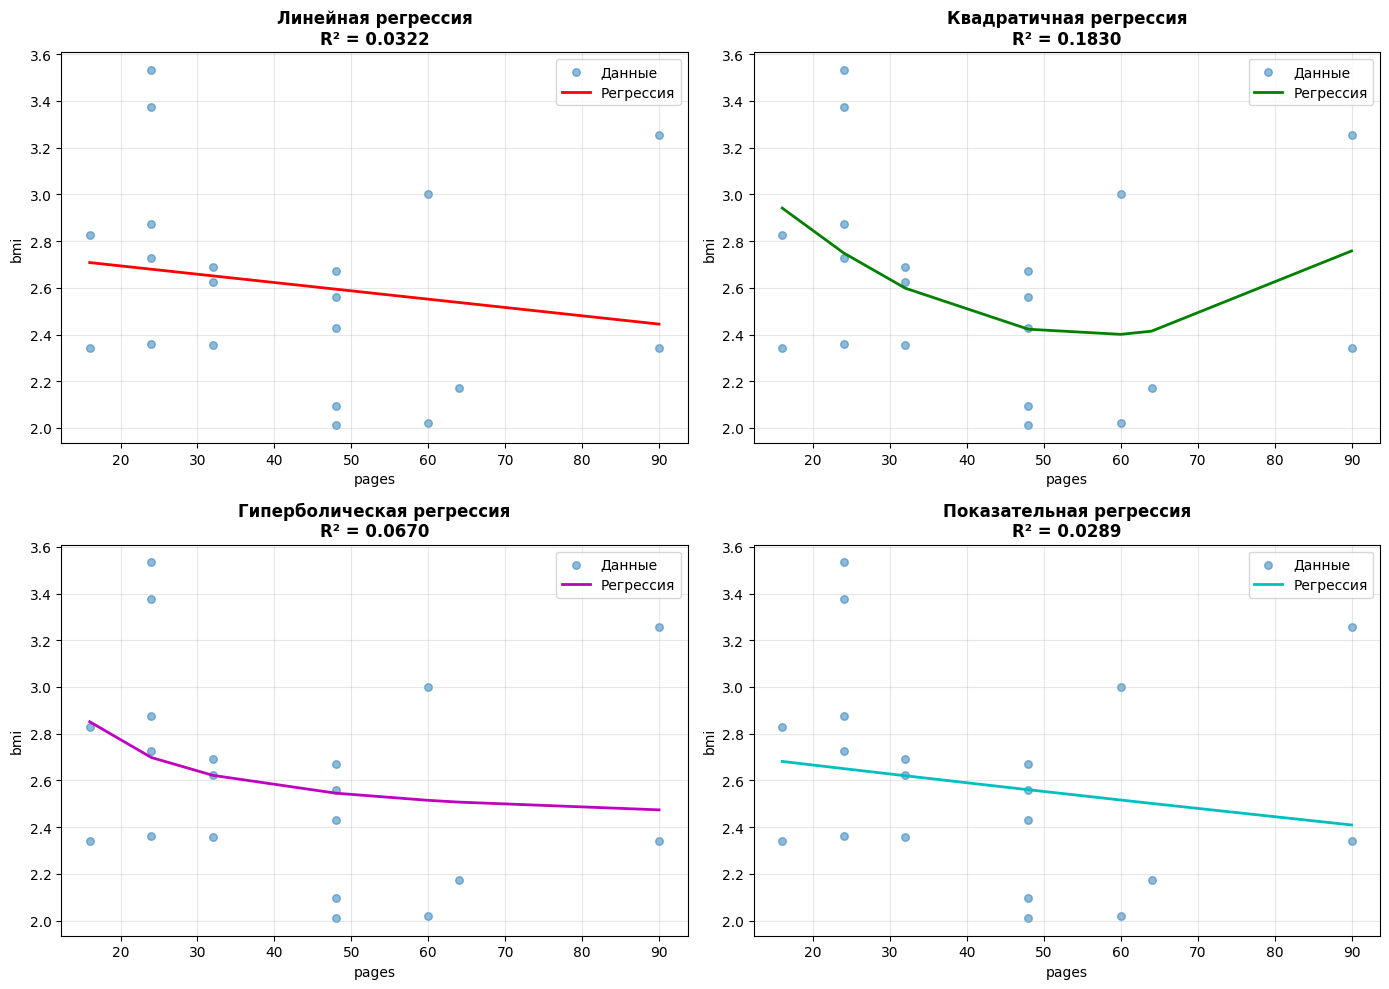

In [17]:
# Визуализация регрессий
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Сортируем для красивых линий
x_sorted = np.sort(x)

# 3.1 Линейная
axes[0, 0].scatter(x, y, alpha=0.5, s=30, label='Данные')
X_sorted = np.column_stack([x_sorted, np.ones(len(x_sorted))])
y_line = X_sorted @ w_lin
axes[0, 0].plot(x_sorted, y_line, 'r-', linewidth=2, label='Регрессия')
axes[0, 0].set_xlabel(col1_name)
axes[0, 0].set_ylabel(col2_name)
axes[0, 0].set_title(f'Линейная регрессия\nR² = {r2_lin:.4f}', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 3.2 Квадратичная
axes[0, 1].scatter(x, y, alpha=0.5, s=30, label='Данные')
X_sorted_quad = np.column_stack([x_sorted**2, x_sorted, np.ones(len(x_sorted))])
y_quad_line = X_sorted_quad @ w_quad
axes[0, 1].plot(x_sorted, y_quad_line, 'g-', linewidth=2, label='Регрессия')
axes[0, 1].set_xlabel(col1_name)
axes[0, 1].set_ylabel(col2_name)
axes[0, 1].set_title(f'Квадратичная регрессия\nR² = {r2_quad:.4f}', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3.3 Гиперболическая
axes[1, 0].scatter(x_hyp, y_hyp, alpha=0.5, s=30, label='Данные')
x_sorted_hyp = np.sort(x_hyp)
X_sorted_hyp = np.column_stack([1/x_sorted_hyp, np.ones(len(x_sorted_hyp))])
y_hyp_line = X_sorted_hyp @ w_hyp
axes[1, 0].plot(x_sorted_hyp, y_hyp_line, 'm-', linewidth=2, label='Регрессия')
axes[1, 0].set_xlabel(col1_name)
axes[1, 0].set_ylabel(col2_name)
axes[1, 0].set_title(f'Гиперболическая регрессия\nR² = {r2_hyp:.4f}', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# 3.4 Показательная
if r2_exp > -np.inf:
    axes[1, 1].scatter(x_exp, y_exp, alpha=0.5, s=30, label='Данные')
    x_sorted_exp = np.sort(x_exp)
    y_exp_line = w0_exp * (w1_exp ** x_sorted_exp)
    axes[1, 1].plot(x_sorted_exp, y_exp_line, 'c-', linewidth=2, label='Регрессия')
    axes[1, 1].set_xlabel(col1_name)
    axes[1, 1].set_ylabel(col2_name)
    axes[1, 1].set_title(f'Показательная регрессия\nR² = {r2_exp:.4f}', fontweight='bold')
    axes[1, 1].legend()
    axes[1, 1].grid(alpha=0.3)
else:
    axes[1, 1].text(0.5, 0.5, 'Невозможно построить', 
                   ha='center', va='center', fontsize=14)
    axes[1, 1].set_title('Показательная регрессия', fontweight='bold')

plt.tight_layout()
plt.show()

In [18]:
# Задание 4. Проверка уравнения регрессии

In [20]:
print("4. ПРОВЕРКА ЗНАЧИМОСТИ УРАВНЕНИЙ РЕГРЕССИИ")
print("="*50)

# Находим лучшую и худшую модель
models = {
    'Линейная': r2_lin,
    'Квадратичная': r2_quad,
    'Гиперболическая': r2_hyp,
    'Показательная': r2_exp if r2_exp > -np.inf else -1
}

best_model = max(models, key=models.get)
worst_model = min(models, key=models.get)

print(f"Лучшая модель: {best_model} (R² = {models[best_model]:.4f})")
print(f"Худшая модель: {worst_model} (R² = {models[worst_model]:.4f})")

4. ПРОВЕРКА ЗНАЧИМОСТИ УРАВНЕНИЙ РЕГРЕССИИ
Лучшая модель: Квадратичная (R² = 0.1830)
Худшая модель: Показательная (R² = 0.0289)


In [ ]:
'''
Проверка моделей с помощью критерия Фишера
Цель: проверить, значима ли модель в целом.
Формула:
𝐹 = (𝑅^2 / (𝑘 − 1))((1 − 𝑅^2)/(𝑛 − 𝑘))
'''

In [21]:
def fisher_test(r2, n, k):
    if r2 >= 1 or r2 < 0:
        return None, None
    
    F = (r2 / (1 - r2)) * ((n - k) / (k - 1))
    df1 = k - 1
    df2 = n - k
    
    p_value = 1 - stats.f.cdf(F, df1, df2)
    F_crit = stats.f.ppf(0.95, df1, df2)
    
    return F, p_value, F_crit

In [22]:
# Проверка для лучшей модели
print(f"\n4.1 Проверка значимости: {best_model}")
if best_model == 'Линейная':
    r2_best = r2_lin
    n_best = len(x)
    k_best = 2
elif best_model == 'Квадратичная':
    r2_best = r2_quad
    n_best = len(x)
    k_best = 3
elif best_model == 'Гиперболическая':
    r2_best = r2_hyp
    n_best = len(x_hyp)
    k_best = 2
else:  # Показательная
    r2_best = r2_exp
    n_best = len(x_exp)
    k_best = 2

F_best, p_best, F_crit_best = fisher_test(r2_best, n_best, k_best)
print(f"    R² = {r2_best:.4f}")
print(f"    F-статистика = {F_best:.4f}")
print(f"    F-критическое (α=0.05) = {F_crit_best:.4f}")
print(f"    p-value = {p_best:.4e}")
print(f"    Модель значима: {'Да' if p_best < 0.05 else 'Нет'} (F > F_crit: {F_best > F_crit_best})")

# Проверка для худшей модели
print(f"\n4.2 Проверка значимости: {worst_model}")
if worst_model == 'Линейная':
    r2_worst = r2_lin
    n_worst = len(x)
    k_worst = 2
elif worst_model == 'Квадратичная':
    r2_worst = r2_quad
    n_worst = len(x)
    k_worst = 3
elif worst_model == 'Гиперболическая':
    r2_worst = r2_hyp
    n_worst = len(x_hyp)
    k_worst = 2
else:  # Показательная
    r2_worst = r2_exp
    n_worst = len(x_exp)
    k_worst = 2

F_worst, p_worst, F_crit_worst = fisher_test(r2_worst, n_worst, k_worst)
print(f"    R² = {r2_worst:.4f}")
print(f"    F-статистика = {F_worst:.4f}")
print(f"    F-критическое (α=0.05) = {F_crit_worst:.4f}")
print(f"    p-value = {p_worst:.4e}")
print(f"    Модель значима: {'Да' if p_worst < 0.05 else 'Нет'} (F > F_crit: {F_worst > F_crit_worst})")


4.1 Проверка значимости: Квадратичная
    R² = 0.1830
    F-статистика = 1.9036
    F-критическое (α=0.05) = 3.5915
    p-value = 1.7947e-01
    Модель значима: Нет (F > F_crit: False)

4.2 Проверка значимости: Показательная
    R² = 0.0289
    F-статистика = 0.5358
    F-критическое (α=0.05) = 4.4139
    p-value = 4.7360e-01
    Модель значима: Нет (F > F_crit: False)
